<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/TP2_EyCD_Garay/EyCD_MEV_Garay_receta_extra_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

_GRUPO1_

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Ormaechea, Sebastián


En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.





- Leer los datos

In [80]:
# Setup necesario para correr pandas profiling
#!pip install pandas_profiling==2.8.0
#!pip install pandas==1.2.0
########################################
# Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
from google.colab import files
########################################
# Descarga de base de datos
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
########################################
!pip install gdown
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime


## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

### Receta [Extra] = Normalizacion + Filtrado Por  10% de Nubosidad + Imputacion Estacional

##1- Descarga del dataset

In [82]:
import pandas as pd  

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:00<00:00, 222MB/s]


In [83]:
# Utilizamos la librería missingno para la visualización del total de datos
import missingno as msno

##2- Obtención del dataframe

In [84]:
df_=pd.read_csv("/content/espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
df_

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.0990,0.1684,0.115990,0.11270,0.0,0.0694,31,0.0862,0.1627,0.107387,...,0.892669,0.0,0.545993,31,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307532496,NaN,3824.467794,2022-04-17
208928,0.1145,0.3240,0.149746,0.13665,0.0,0.2095,80,0.0977,0.3363,0.149332,...,1.084102,0.0,2.805242,80,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307535460,Plaza Exodo Jujeño,7184.535857,2022-04-17
208929,0.0993,0.1388,0.110870,0.10625,0.0,0.0395,10,0.0930,0.1473,0.106160,...,0.914887,0.0,0.199024,10,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307796387,NaN,1147.997645,2022-04-17
208930,0.0991,0.1407,0.124008,0.12570,0.0,0.0416,53,0.0852,0.1377,0.118574,...,0.991200,0.0,0.299910,53,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307097955,NaN,5185.690046,2022-04-17


##3- Extracción de columnas de interés

In [85]:
# Creamos un nuevo dataframe con las variables de interés 
df_interest_E = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_E)

208932

##4- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [86]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_E['date']= pd.to_datetime(df_interest_E['date'])

# Extraemos el mes de cada registro.
df_interest_E['month'] = df_interest_E['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_E, "month")
df_interest_E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [87]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_E.loc[df_interest_E['season'] == 'summer', 'B02_summer'] = df_interest_E['B02_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B02_autumn'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B02_winter'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B02_spring'] = df_interest_E['B02_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B06_summer'] = df_interest_E['B06_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B06_autumn'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B06_winter'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B06_spring'] = df_interest_E['B06_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B11_summer'] = df_interest_E['B11_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B11_autumn'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B11_winter'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B11_spring'] = df_interest_E['B11_median']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [88]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

In [89]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [90]:
# Aplicamos la función de detección de outliers
find_outliers(df_interest_E, Season_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [91]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_E2_summer = df_interest_E[~((df_interest_E['outl_B02_summer']==1) & (df_interest_E['outl_B06_summer']==1) & 
                        (df_interest_E['outl_B11_summer']==1))]
print(len(df_interest_E2_summer))

df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_E['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
print(len(df_interest_E2_autumn))

df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_E['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
print(len(df_interest_E2_winter))

df_interest_E2_spring = df_interest_E2_winter[~((df_interest_E['outl_B02_spring']==1) & 
                        (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
print(len(df_interest_E2_spring))

205669


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


200130


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


197680


##Dividimos el conjunto de datos por estación

In [92]:
df_interest_E2_spring.columns

Index(['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season',
       'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer',
       'B06_autumn', 'B06_winter', 'B06_spring', 'B11_summer', 'B11_autumn',
       'B11_winter', 'B11_spring', 'outl_B02_summer', 'outl_B02_autumn',
       'outl_B02_winter', 'outl_B02_spring', 'outl_B06_summer',
       'outl_B06_autumn', 'outl_B06_winter', 'outl_B06_spring',
       'outl_B11_summer', 'outl_B11_autumn', 'outl_B11_winter',
       'outl_B11_spring'],
      dtype='object')

In [93]:
df_interest_summer = df_interest_E2_spring[df_interest_E2_spring['season']=="summer"]
df_interest_autumn = df_interest_E2_spring[df_interest_E2_spring['season']=="autumn"]
df_interest_winter = df_interest_E2_spring[df_interest_E2_spring['season']=="winter"]
df_interest_spring = df_interest_E2_spring[df_interest_E2_spring['season']=="spring"]

Seleccionamos las columnas de interés para cada subconjunto

In [94]:
df_summer = df_interest_summer[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season','B02_summer',  'B06_summer',
    'B11_summer', 'outl_B02_summer', 'outl_B06_summer',
       'outl_B11_summer']]

df_autumn = df_interest_autumn[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season','B02_autumn',  'B06_autumn',
    'B11_autumn', 'outl_B02_autumn', 'outl_B06_autumn',
       'outl_B11_autumn']]

df_winter = df_interest_winter[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season','B02_winter',  'B06_winter',
    'B11_winter', 'outl_B02_winter', 'outl_B06_winter',
       'outl_B11_winter']]

df_spring = df_interest_spring[['B02_median', 'B06_median', 'B11_median', 'osm_id', 'date', 'ndvi_max',
       'area_m2', 'raster', 'clouds_on_raster', 'month', 'season','B02_spring',  'B06_spring',
    'B11_spring', 'outl_B02_spring', 'outl_B06_spring',
       'outl_B11_spring']]                    

##5- Normalización para cada subconjunto
Utilizamos el objeto scikit-learn MinMaxScaler para escalar los datos, debido a que imputaremos por los K-vecinos más cercanos. Dicho algoritmo utiliza medidas de distancias y se ve afectado por la escala de las variables de entrada. Efectuamos la normalización para cada subconjunto por separado.

In [95]:
cols_summer = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max',
       'B02_summer',  'B06_summer', 'B11_summer']
cols_autumn = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max',
       'B02_autumn',  'B06_autumn', 'B11_autumn']
cols_winter = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max',
       'B02_winter',  'B06_winter', 'B11_winter']
cols_spring = ['B02_median', 'B06_median', 'B11_median', 'ndvi_max',
       'B02_spring', 'B06_spring', 'B11_spring']


In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
#Subconjunto verano
estandarizador1 = MinMaxScaler()
estandarizador1.fit(df_summer[cols_summer])
df_summer.loc[:, cols_summer] = estandarizador1.transform(df_summer[cols_summer])
df_summer

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season,B02_summer,B06_summer,B11_summer,outl_B02_summer,outl_B06_summer,outl_B11_summer
0,0.059714,0.434332,0.417777,605976736,2017-01-03,0.662894,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer,0.059714,0.434332,0.417777,0,0,0
1,0.084792,0.630283,0.598532,559322368,2017-01-03,0.661913,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer,0.084792,0.630283,0.598532,0,0,0
2,0.100435,0.617004,0.577331,559322369,2017-01-03,0.652560,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer,0.100435,0.617004,0.577331,0,0,0
3,0.102048,0.738461,0.632645,559328111,2017-01-03,0.708477,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer,0.102048,0.738461,0.632645,0,1,0
4,0.124022,0.743644,0.694482,559328112,2017-01-03,0.649143,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer,0.124022,0.743644,0.694482,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206656,0.101676,0.593684,0.498777,307531370,2022-03-28,0.674109,3658.725375,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer,0.101676,0.593684,0.498777,0,0,0
206657,0.067412,0.485182,0.421854,307532496,2022-03-28,0.663206,3824.467794,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer,0.067412,0.485182,0.421854,0,0,0
206658,0.119801,0.661215,0.607774,307535460,2022-03-28,0.615957,7184.535857,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer,0.119801,0.661215,0.607774,0,0,0
206659,0.058473,0.581862,0.499320,307796387,2022-03-28,0.703242,1147.997645,S2A_MSIL1C_20220328T141741_N0400_R010_T20JLL_2...,0.0,3,summer,0.058473,0.581862,0.499320,0,0,0


In [98]:
#Subconjunto otoño
estandarizador2 = MinMaxScaler()
estandarizador2.fit(df_autumn[cols_autumn])
df_autumn.loc[:, cols_autumn] = estandarizador2.transform(df_autumn[cols_autumn])
df_autumn

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season,B02_autumn,B06_autumn,B11_autumn,outl_B02_autumn,outl_B06_autumn,outl_B11_autumn
4542,NaN,NaN,NaN,567533027,2017-04-03,NaN,11345.928553,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn,NaN,NaN,NaN,0,0,0
4543,NaN,NaN,NaN,567533024,2017-04-03,NaN,1203.377855,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn,NaN,NaN,NaN,0,0,0
4544,NaN,NaN,NaN,567186536,2017-04-03,NaN,5343.511217,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn,NaN,NaN,NaN,0,0,0
4545,NaN,NaN,NaN,559322369,2017-04-03,NaN,2004.192528,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn,NaN,NaN,NaN,0,0,0
4546,NaN,NaN,NaN,559328112,2017-04-03,NaN,4587.356048,S2A_MSIL1C_20170403T142031_N0204_R010_T20JLL_2...,99.960368,4,autumn,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.127158,0.484265,0.432084,307532496,2022-04-17,0.544724,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn,0.127158,0.484265,0.432084,0,0,0
208928,0.216076,0.588070,0.652071,307535460,2022-04-17,0.468146,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn,0.216076,0.588070,0.652071,0,0,0
208929,0.103211,0.543917,0.518343,307796387,2022-04-17,0.547404,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn,0.103211,0.543917,0.518343,0,0,0
208930,0.175422,0.495538,0.603024,307097955,2022-04-17,0.513764,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.000000,4,autumn,0.175422,0.495538,0.603024,0,0,0


In [99]:
#Subconjunto invierno
estandarizador3 = MinMaxScaler()
estandarizador3.fit(df_winter[cols_winter])
df_winter.loc[:, cols_winter] = estandarizador3.transform(df_winter[cols_winter])
df_winter

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season,B02_winter,B06_winter,B11_winter,outl_B02_winter,outl_B06_winter,outl_B11_winter
7570,NaN,NaN,NaN,605976737,2017-07-12,NaN,4310.381780,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter,NaN,NaN,NaN,0,0,0
7571,NaN,NaN,NaN,605976738,2017-07-12,NaN,1701.355603,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter,NaN,NaN,NaN,0,0,0
7572,NaN,NaN,NaN,559322368,2017-07-12,NaN,1502.000513,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter,NaN,NaN,NaN,0,0,0
7573,NaN,NaN,NaN,559322369,2017-07-12,NaN,2004.192528,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter,NaN,NaN,NaN,0,0,0
7574,NaN,NaN,NaN,559328111,2017-07-12,NaN,6940.507640,S2A_MSIL1C_20170712T142041_N0205_R010_T20JLL_2...,97.244996,7,winter,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183189,0.300622,0.700000,0.653785,308115425,2021-09-29,0.449080,5783.100639,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter,0.300622,0.700000,0.653785,1,0,0
183190,0.144090,0.168578,0.104420,308115608,2021-09-29,0.268492,1414.554340,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter,0.144090,0.168578,0.104420,0,1,1
183191,0.218944,0.800849,0.624140,308220055,2021-09-29,0.638596,2594.278780,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter,0.218944,0.800849,0.624140,0,1,0
183192,0.268714,0.792144,0.735310,307796387,2021-09-29,0.467793,1147.997645,S2A_MSIL1C_20210929T141741_N0301_R010_T20JLL_2...,23.889456,9,winter,0.268714,0.792144,0.735310,0,1,0


In [100]:
#subconjunto primavera
estandarizador4 = MinMaxScaler()
estandarizador4.fit(df_spring[cols_spring])
df_spring.loc[:, cols_spring] = estandarizador4.transform(df_spring[cols_spring])
df_spring

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season,B02_spring,B06_spring,B11_spring,outl_B02_spring,outl_B06_spring,outl_B11_spring
12869,0.109339,0.527922,0.541925,307531370,2017-10-15,0.588559,3658.725375,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring,0.109339,0.527922,0.541925,0,0,0
12870,0.062462,0.478571,0.489605,307532496,2017-10-15,0.561315,3824.467794,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring,0.062462,0.478571,0.489605,0,0,0
12871,0.133759,0.590260,0.686355,307535460,2017-10-15,0.503925,7184.535857,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring,0.133759,0.590260,0.686355,0,0,0
12872,0.148975,0.480519,0.621644,307818289,2017-10-15,0.401215,1041.152026,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring,0.148975,0.480519,0.621644,0,0,0
12873,0.101853,0.539610,0.629905,307796632,2017-10-15,0.604364,6574.431543,S2B_MSIL1C_20171015T142029_N0205_R010_T20JLL_2...,0.000000,10,spring,0.101853,0.539610,0.629905,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195301,NaN,NaN,NaN,559322369,2021-12-28,NaN,2004.192528,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring,NaN,NaN,NaN,0,0,0
195302,NaN,NaN,NaN,559322368,2021-12-28,NaN,1502.000513,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring,NaN,NaN,NaN,0,0,0
195303,NaN,NaN,NaN,572612095,2021-12-28,NaN,4056.927248,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring,NaN,NaN,NaN,0,0,0
195304,NaN,NaN,NaN,363076249,2021-12-28,NaN,1492.152733,S2A_MSIL1C_20211228T141741_N0301_R010_T20JLL_2...,92.004816,12,spring,NaN,NaN,NaN,0,0,0


##6- Aplicación de filtro por 10% de nubosidad

In [101]:
# Filtramos por nubosidad < 10%
df_summer_clouds = df_summer[df_summer['clouds_on_raster']<0.1]
print(len(df_summer_clouds))

df_autumn_clouds = df_autumn[df_autumn['clouds_on_raster']<0.1]
print(len(df_autumn_clouds))

df_winter_clouds = df_winter[df_winter['clouds_on_raster']<0.1]
print(len(df_winter_clouds))

df_spring_clouds = df_spring[df_spring['clouds_on_raster']<0.1]
print(len(df_spring_clouds))

31250
25297
28714
27546


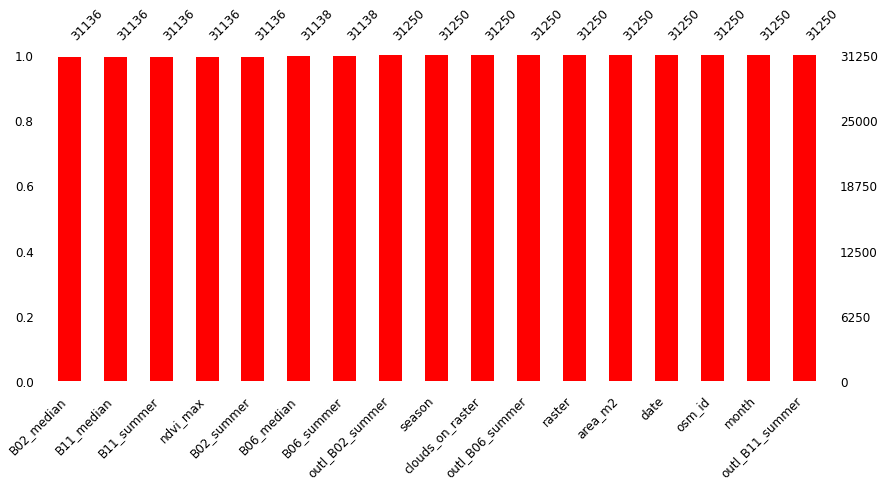

In [102]:
msno.bar(df_summer_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='red')

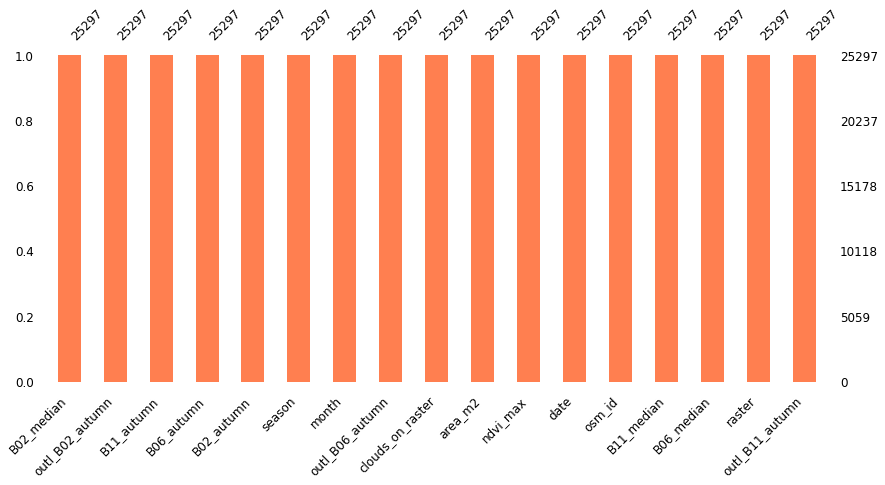

In [103]:
msno.bar(df_autumn_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')

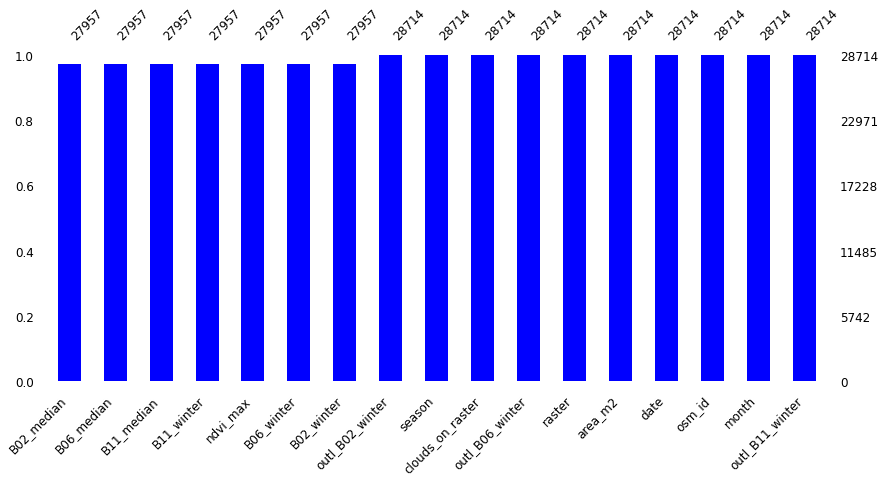

In [104]:

msno.bar(df_winter_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')

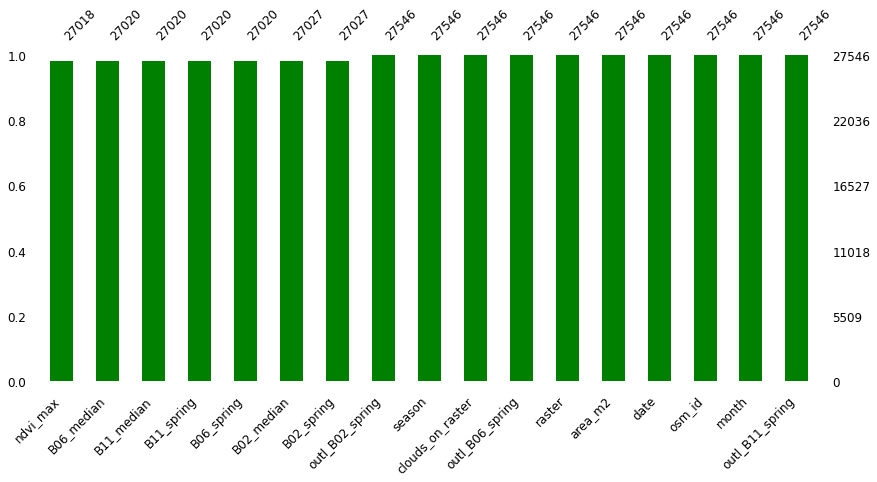

In [105]:

msno.bar(df_spring_clouds,figsize=(14, 6), sort="ascending",fontsize=12, color='green')

**El subconjunto otoño no presenta datos faltantes para imputar.**

##7a- Imputación con filtro de nubosidad
Imputamos valores nulos a las variables bajo el criterio del K-vecino más cercano

In [106]:
#Subconjunto verano
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_imp_summer = df_summer_clouds.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_summer[cols_summer] = kn_imputer.fit_transform(df_imp_summer[cols_summer])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


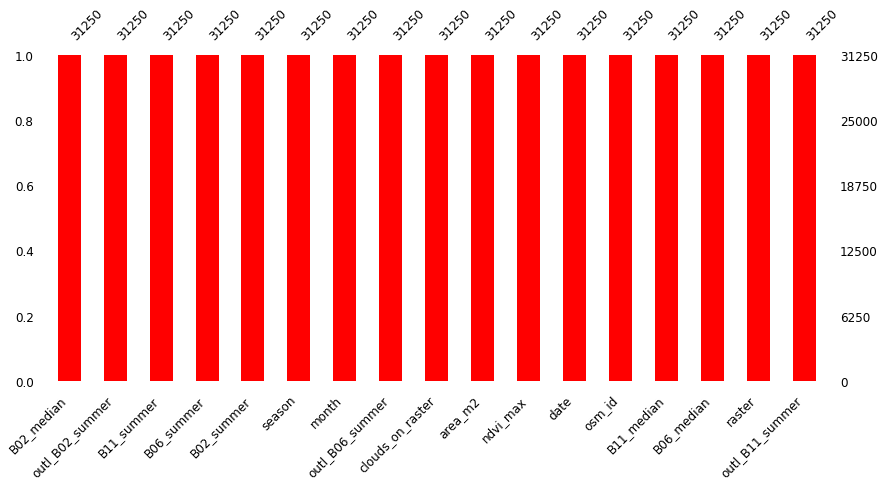

In [107]:
msno.bar(df_imp_summer,figsize=(14, 6), sort="ascending",fontsize=12, color='red')

In [108]:
#Subconjunto invierno
df_imp_winter = df_winter_clouds.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_winter[cols_winter] = kn_imputer.fit_transform(df_imp_winter[cols_winter])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


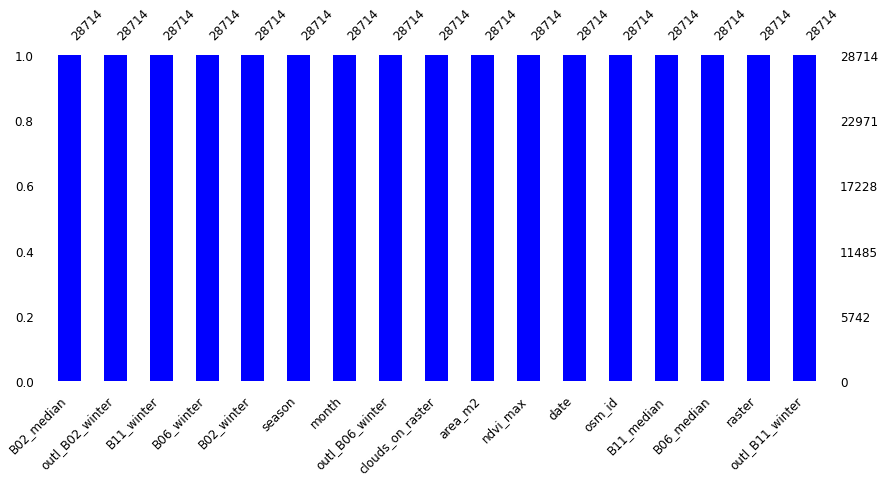

In [109]:
msno.bar(df_imp_winter,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')

In [110]:
#Subconjunto primavera
df_imp_spring = df_spring_clouds.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_spring[cols_spring] = kn_imputer.fit_transform(df_imp_spring[cols_spring])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


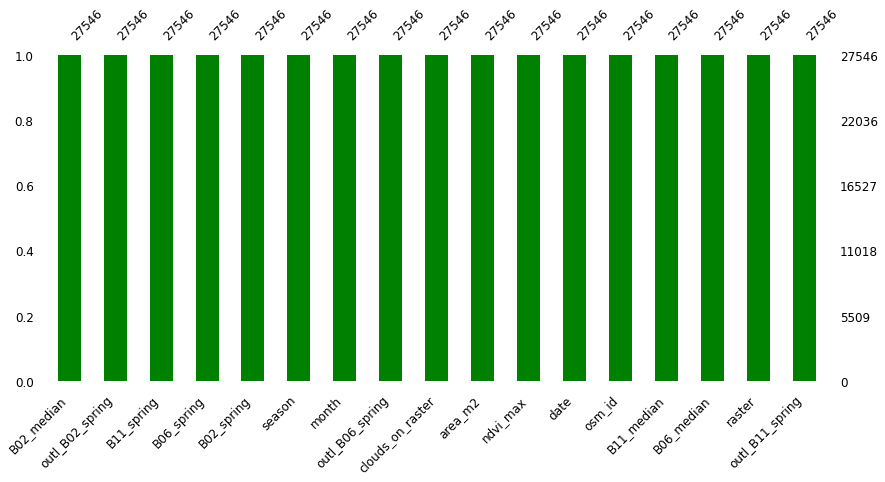

In [111]:
msno.bar(df_imp_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='green')

La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, con filtro en nubosidad.

In [112]:
import seaborn as sns
sns.set_context('talk')

Text(0.5, 1.0, 'Subconjunto Verano')

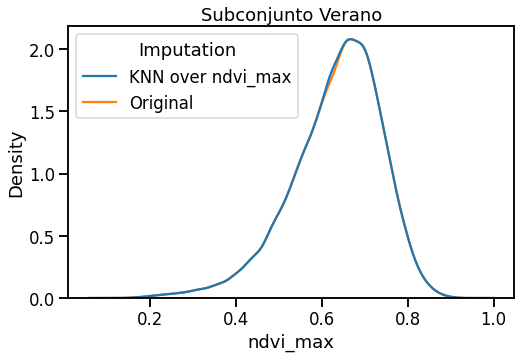

In [113]:
df_imp_ndvi_summer = df_imp_summer.ndvi_max.to_frame()
df_imp_ndvi_summer['Imputation'] = 'KNN over ndvi_max'
df_ndvi_summer = df_summer_clouds.ndvi_max.dropna().to_frame()
df_ndvi_summer['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_summer, df_ndvi_summer], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Verano")

Text(0.5, 1.0, 'Subconjunto Invierno')

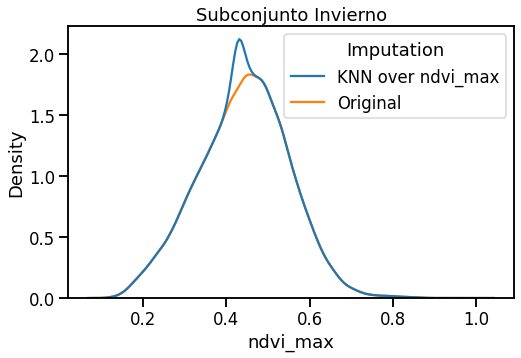

In [114]:
df_imp_ndvi_winter = df_imp_winter.ndvi_max.to_frame()
df_imp_ndvi_winter['Imputation'] = 'KNN over ndvi_max'
df_ndvi_winter = df_winter_clouds.ndvi_max.dropna().to_frame()
df_ndvi_winter['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_winter, df_ndvi_winter], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
h = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Invierno")

Text(0.5, 1.0, 'Subconjunto Primavera')

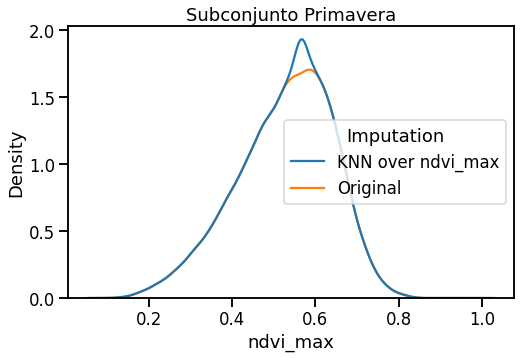

In [115]:
df_imp_ndvi_spring = df_imp_spring.ndvi_max.to_frame()
df_imp_ndvi_spring['Imputation'] = 'KNN over ndvi_max'
df_ndvi_spring = df_spring_clouds.ndvi_max.dropna().to_frame()
df_ndvi_spring['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_spring, df_ndvi_spring], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
j = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Primavera")

##7a- Imputación sin filtro de nubosidad
Imputamos valores nulos a las variables bajo el criterio del K-vecino más cercano, sin realizar previamente el filtrado por nubosidad. Primeramente visualizamos los datos a imputar para cada uno de los subconjuntos.

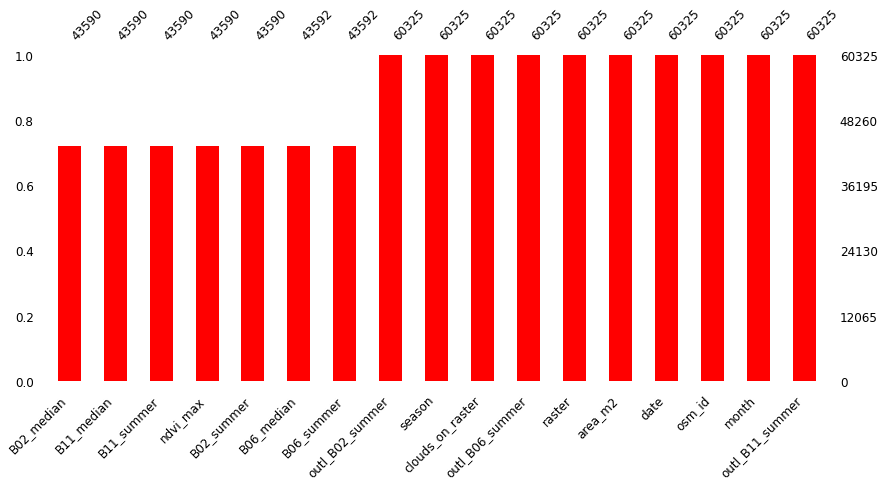

In [116]:
msno.bar(df_summer,figsize=(14, 6), sort="ascending",fontsize=12, color='red')

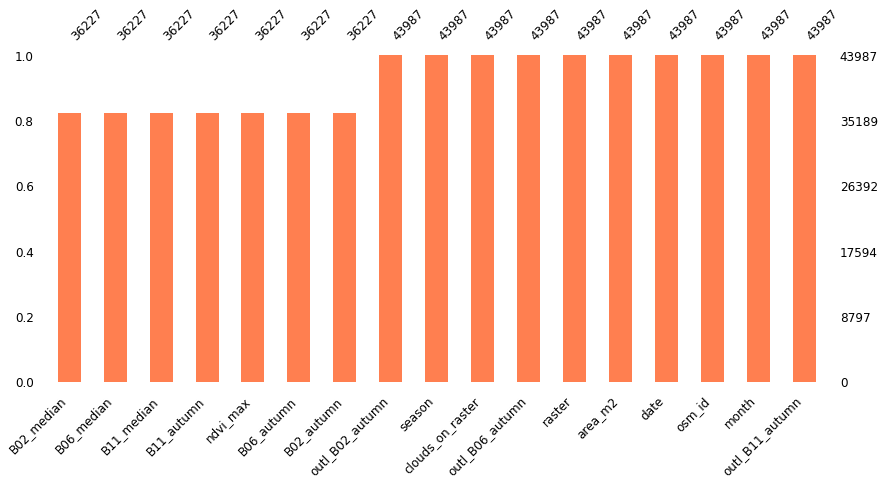

In [117]:
msno.bar(df_autumn,figsize=(14, 6), sort="ascending",fontsize=12, color='coral')

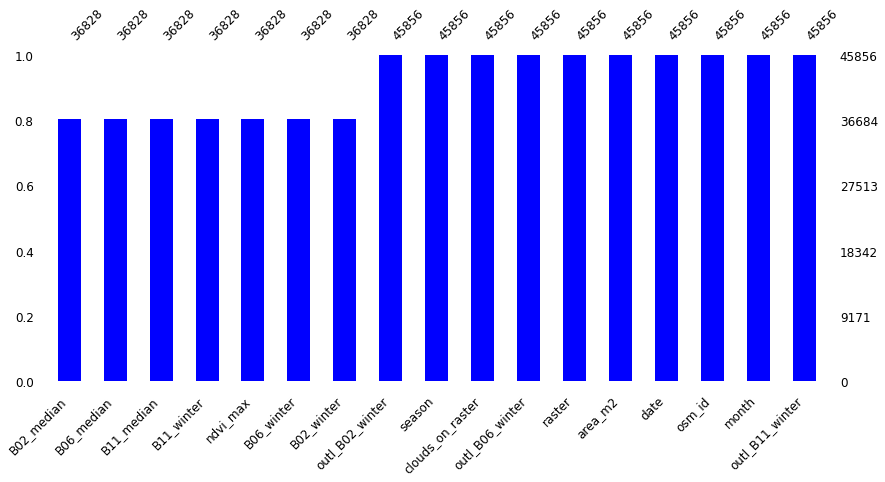

In [118]:
msno.bar(df_winter,figsize=(14, 6), sort="ascending",fontsize=12, color='blue')

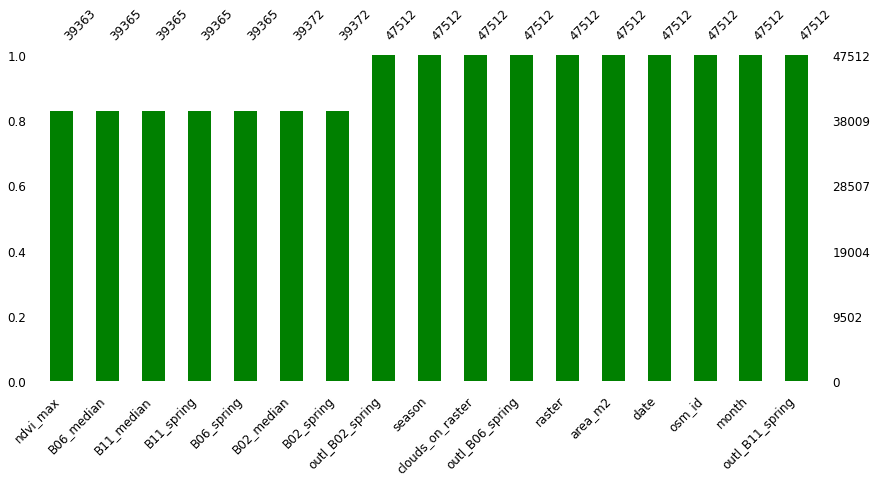

In [119]:
msno.bar(df_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='green')

Observamos que los 4 subconjuntos estacionales presentan datos faltantes para imputar

**Imputación**

In [120]:
#Subconjunto verano
df_imp_summer2 = df_summer.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_summer2[cols_summer] = kn_imputer.fit_transform(df_imp_summer2[cols_summer])

In [121]:
#Subconjunto otoño
df_imp_autumn2 = df_autumn.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_autumn2[cols_autumn] = kn_imputer.fit_transform(df_imp_autumn2[cols_autumn])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [122]:
#Subconjunto invierno
df_imp_winter2 = df_winter.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_winter2[cols_winter] = kn_imputer.fit_transform(df_imp_winter2[cols_winter])

In [123]:
#Subconjunto primavera
df_imp_spring2 = df_spring.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_imp_spring2[cols_spring] = kn_imputer.fit_transform(df_imp_spring2[cols_spring])

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, sin filtro en nubosidad.

Text(0.5, 1.0, 'Subconjunto Verano')

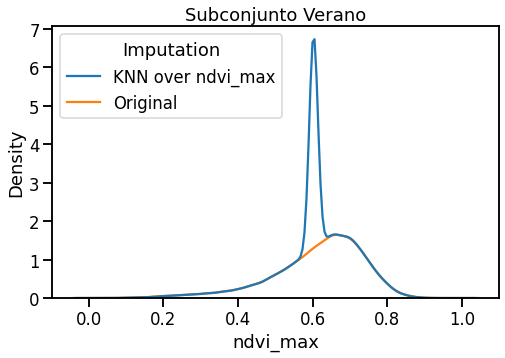

In [124]:
df_imp_ndvi_summer2 = df_imp_summer2.ndvi_max.to_frame()
df_imp_ndvi_summer2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_summer2 = df_summer.ndvi_max.dropna().to_frame()
df_ndvi_summer2['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_summer2, df_ndvi_summer2], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Verano")

Text(0.5, 1.0, 'Subconjunto Invierno')

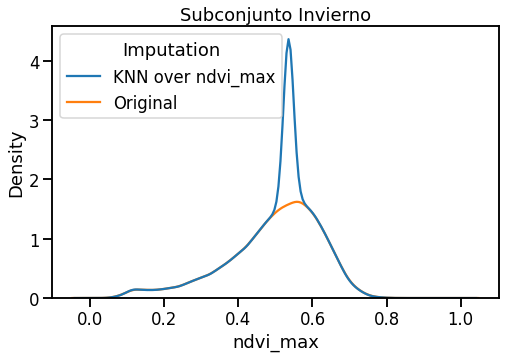

In [125]:
df_imp_ndvi_autumn2 = df_imp_autumn2.ndvi_max.to_frame()
df_imp_ndvi_autumn2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_autumn2 = df_autumn.ndvi_max.dropna().to_frame()
df_ndvi_autumn2['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_autumn2, df_ndvi_autumn2], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
m2 = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Invierno")

Text(0.5, 1.0, 'Subconjunto Invierno')

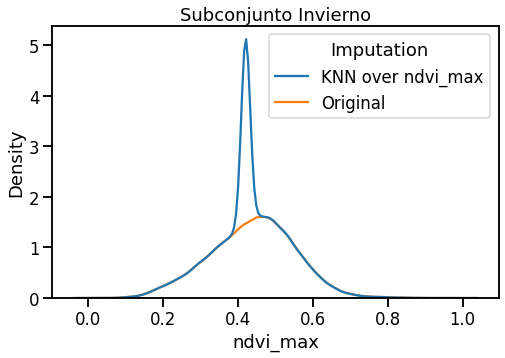

In [126]:
df_imp_ndvi_winter2 = df_imp_winter2.ndvi_max.to_frame()
df_imp_ndvi_winter2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_winter2 = df_winter.ndvi_max.dropna().to_frame()
df_ndvi_winter2['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_winter2, df_ndvi_winter2], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
h = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Invierno")

Text(0.5, 1.0, 'Subconjunto Primavera')

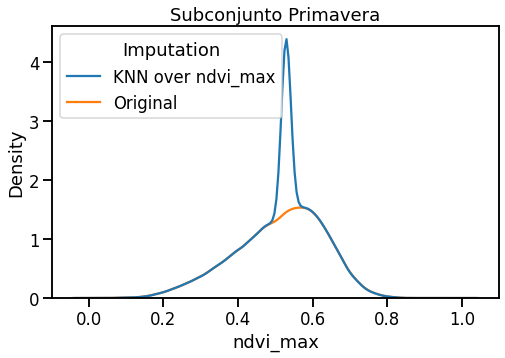

In [127]:
df_imp_ndvi_spring2 = df_imp_spring2.ndvi_max.to_frame()
df_imp_ndvi_spring2['Imputation'] = 'KNN over ndvi_max'
df_ndvi_spring2 = df_spring.ndvi_max.dropna().to_frame()
df_ndvi_spring2['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi_spring2, df_ndvi_spring2], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
j = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')
plt.title("Subconjunto Primavera")